In [2]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [163]:
v = "v10_ext1"
final_clusters = pd.read_parquet(
    f"/data/uscuni-ulce/processed_data/clusters/final_clusters_{v}.pq"
)[0]
from core.cluster_validation import get_color

final_colors = pd.DataFrame(
    get_color(final_clusters.values), final_clusters.values
).drop_duplicates()
final_colors.loc[-1] = [255, 255, 255]

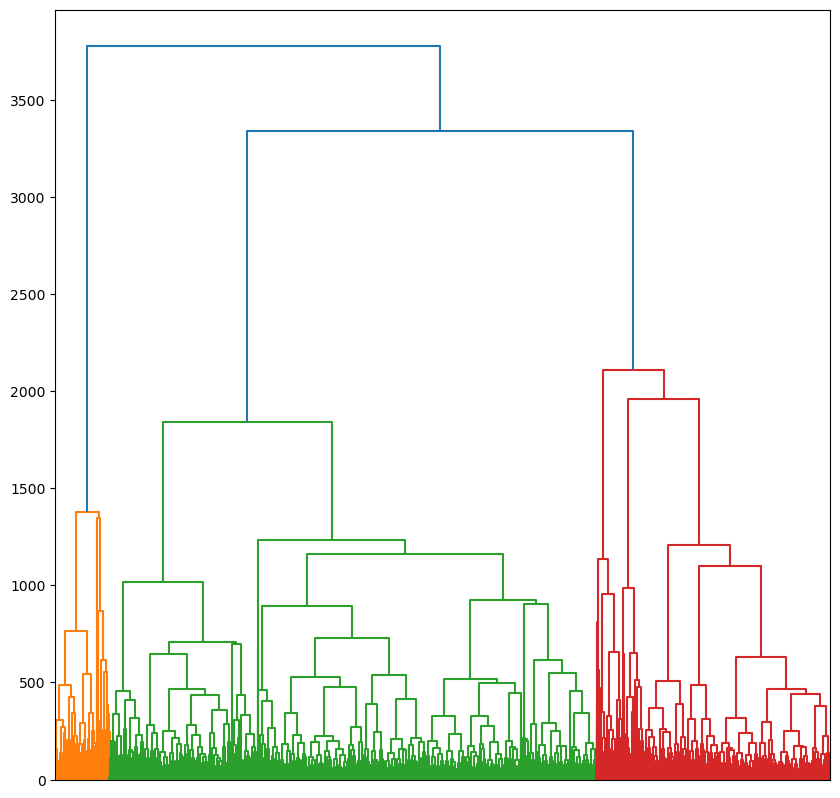

In [198]:
linkage_matrix = np.load(
    f"/data/uscuni-ulce/processed_data/clusters/complete_linkage_10_{v}.npy"
)
## final dendrogram
fig, ax = plt.subplots(figsize=(10, 10))
_ = dendrogram(linkage_matrix, ax=ax, no_labels=True)

In [5]:
region_hulls = gpd.read_parquet(
    "/data/uscuni-ulce/regions/region_hulls_v3.parquet"
)

In [118]:
region_hulls.explore()

In [164]:
cluster_mapping = pd.read_parquet(
    f"/data/uscuni-ulce/processed_data/clusters/cluster_mapping_{v}.pq"
)

In [115]:
cluster_mapping

,1,2,3,4,5,6
7,,,,,,
4,1,1,1,1,2,3
6,1,1,1,1,2,4
88,2,4,7,13,20,48
3,1,1,1,1,2,3
103,2,4,8,17,24,55
...,...,...,...,...,...,...
20,1,2,3,4,6,10
63,2,3,6,10,15,32
61,2,3,6,9,14,30


In [116]:
cluster_mapping[1].unique()

array([1, 2], dtype=int32)

In [117]:
cluster_mapping[3]

7
4      1
6      1
88     7
3      1
103    8
      ..
20     3
63     6
61     6
11     2
46     5
Name: 3, Length: 110, dtype: int32

In [209]:
region_id = 69333  # prague

# region_id = 4

# region_id = 99886 # bratislava

# region_id = 151676 # vilnius


# region_id = 8707 # frankfurt / mainz
# region_id = 5883 # freiburtg
# region_id = 38679 # munich
# region_id = 55763 # berlin
# region_id = 34266 # nuremberg

# region_id = 86873 # vienna


# region_id = 107131 # krakow

# region_id= 66593 # usti

# region_id = 62954 # lindz
# region_id = 91011 # above brno

# region_id = 51289 # salzburg

# region_id = 93167
# region_id = 403958  # paris
# region_id = 370160  # barcelona
region_id  = 523438 # nice
region_id  = 496392 # amsterdam
region_id  = 199734 # madrid

In [210]:
etcs = gpd.read_parquet(
    f"/data/uscuni-ulce/processed_data/clusters/clusters_{region_id}_{v}.pq"
)

In [211]:
# etcs = gpd.read_parquet(f'/data/uscuni-ulce/processed_data/clusters/clusters_{69333}_{v}.pq')
# etcs2 = gpd.read_parquet(f'/data/uscuni-ulce/processed_data/clusters/clusters_{74378}_{v}.pq')

# etcs = pd.concat((etcs, etcs2), ignore_index=True)

In [212]:
# etcs = pd.merge(etcs, res, left_on='morph', right_index=True)

In [213]:
import lonboard

layer = lonboard.SolidPolygonLayer.from_geopandas(etcs, opacity=0.7)

from sidecar import Sidecar

sc = Sidecar(title="Final Clusters")
m = lonboard.Map(layer, basemap_style=lonboard.basemap.CartoBasemap.DarkMatter)
with sc:
    display(m)

/home/martin/dev/urban_taxonomy/.pixi/envs/default/lib/python3.12/site-packages/lonboard/_geoarrow/ops/reproject.py:97: UserWarning: Input being reprojected to EPSG:4326 CRS
  warnings.warn("Input being reprojected to EPSG:4326 CRS")


In [215]:
from core.cluster_validation import get_color

layer.get_fill_color = get_color(etcs.final.map(cluster_mapping[4].to_dict()).fillna(-1).astype(int))

In [200]:
cluster_mapping[3].nunique()

14

In [172]:
etcs

,hauteur,date_d_apparition,beginning,end,currentUse,floor_area,longest_ridge_line_height,year_of_construction,x,y,id,iid,geometry,label,morph,final
0,7.1,None,None,None,None,NaN,NaN,NaN,4.074289e+06,2.275864e+06,778228,778228,"POLYGON Z ((4074281.751 2275872.302 11.1, 4074...",512,523438_0_1458,131
1,10.9,None,None,None,None,NaN,NaN,NaN,4.089195e+06,2.275794e+06,886761,886761,"POLYGON Z ((4089148.619 2275797.634 35.5, 4089...",1399,523438_0_57,166
2,2.9,1900-01-01,None,None,None,NaN,NaN,NaN,4.094213e+06,2.287965e+06,913472,913472,"POLYGON Z ((4094208.014 2287967.979 16.9, 4094...",1663,523438_0_807,173
3,7.8,None,None,None,None,NaN,NaN,NaN,4.094202e+06,2.287960e+06,913473,913473,"POLYGON Z ((4094192.012 2287960.014 21.2, 4094...",1663,523438_0_807,173
4,2.8,None,None,None,None,NaN,NaN,NaN,4.065497e+06,2.272406e+06,950453,950453,"POLYGON Z ((4065492.966 2272403.969 414, 40654...",3706,523438_1_2,176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509339,4.1,None,None,None,None,NaN,NaN,NaN,4.060535e+06,2.323334e+06,49021408,49021408,"POLYGON Z ((4060528.44 2323334.372 531.4, 4060...",2198,523438_1277_-1,-1
509340,5.7,None,None,None,None,NaN,NaN,NaN,4.060650e+06,2.323329e+06,49021409,49021409,"POLYGON Z ((4060641.371 2323333.625 529, 40606...",2198,523438_1277_-1,-1
509341,NaN,None,None,None,None,NaN,NaN,NaN,4.060423e+06,2.323394e+06,49021410,49021410,"POLYGON Z ((4060419.972 2323392.117 -1000, 406...",2198,523438_1277_-1,-1
509342,6.8,None,None,None,None,NaN,NaN,NaN,4.076046e+06,2.283756e+06,49152293,49152293,"POLYGON Z ((4076038.855 2283749.307 124.8, 407...",1528,523438_0_686,53


In [28]:
# layer.get_fill_color = get_color(etcs.morph.factorize()[0])

In [20]:
cdata = pd.read_parquet(f"/data/uscuni-ulce/processed_data/clusters/cdata_{v}.pq")

In [21]:
cdata.style.background_gradient(axis=0, cmap="BuGn")

,sdbAre,sdbPer,sdbCoA,ssbCCo,ssbSqu,ssbERI,ssbElo,libNCo,ldbPWL,ltcBuA,mtbAli,mtbNDi,ltbIBD,stbSAl,sdsLen,sssLin,ldsMSL,ldsRea,ldsAre,sisBpM,sdsSPW,sdsSPO,sdsSWD,lcdMes,linP3W,linP4W,linPDE,lcnClo,lddNDe,linWID,ldsCDL,xcnSCl,mtdMDi,sddAre,midRea,midAre,sdcLAL,sdcAre,sscCCo,sscERI,mtcWNe,mdcAre,ltcWRB,sicCAR,sdsAre,mibCou,mibAre,mibLen,mibElo,mibERI,mibCCo,mibLAL,mibFR,mibSCo,micBAD,midBAD,limLPS,limAre
1,389.775612,94.278728,0.000000,0.413456,0.358902,0.996464,0.456751,0.000000,126.454408,0.894444,2.554969,26.102934,30.639372,4.972203,248.675447,0.993886,183.224968,187.000000,493869.808847,0.041795,34.137927,0.718246,3.497262,0.102568,0.714286,0.132297,0.137931,0.000003,0.004670,0.008718,241.696820,0.000000,201.654043,38185.107153,30.000000,89456.225340,91.806850,2942.818062,0.466737,0.972877,0.029125,27612.558034,0.000028,0.147965,36170.633503,1.000000,585.220948,125.860792,0.447964,0.943948,0.363889,48.216476,4.497810,4.497810,414.397558,350.350963,1.000000,29202.268591
2,172.979938,58.750544,0.000000,0.502542,0.384315,0.992234,0.585859,0.000000,198.151437,0.600000,1.959907,12.001535,16.753035,3.735567,209.727533,0.996166,160.622706,351.000000,409155.308703,0.096817,28.153352,0.511194,3.820425,0.115646,0.703125,0.157895,0.120690,0.000003,0.005120,0.009866,194.648341,0.000000,171.631001,26169.702865,62.000000,71937.035645,47.215604,765.495370,0.454105,0.965922,0.053944,9313.492949,0.000053,0.254647,23460.888640,4.000000,1053.780186,200.055970,0.541369,0.738082,0.342873,66.538592,4.943476,4.943476,305.969256,289.735117,1.000000,27760.053069
3,219.189543,67.110053,0.000000,0.469869,0.353383,0.996027,0.529649,0.000000,112.211980,0.800000,2.772059,18.710443,22.372117,4.433139,204.262893,0.995790,157.489504,249.500000,385279.175112,0.064985,29.708114,0.603880,3.929751,0.116505,0.730769,0.134800,0.125000,0.000005,0.005287,0.009983,192.357145,0.000000,167.327445,26447.994270,42.000000,67461.149794,63.981525,1438.399916,0.465578,0.972801,0.041510,15017.672628,0.000045,0.172871,24565.195870,2.000000,466.788579,111.719242,0.486252,0.915885,0.378657,41.749682,4.114390,4.114390,285.887493,254.066749,1.000000,22403.023698
4,171.358009,58.717412,0.000000,0.504157,0.290004,0.999439,0.570796,0.000000,85.207061,0.857143,2.963935,24.990067,31.107123,6.149024,339.130177,0.988934,255.867875,257.000000,724109.002865,0.053821,33.223494,0.801020,4.053542,0.088889,0.729730,0.107143,0.153574,0.000003,0.003453,0.006166,354.607890,0.000000,271.927320,62980.236551,44.000000,135156.196634,82.597760,2222.982778,0.450509,0.969019,0.031755,23997.576438,0.000025,0.104695,61159.235351,1.000000,315.059879,84.644802,0.561674,0.962147,0.456233,31.256400,3.651711,3.651711,327.894679,355.550488,1.000000,25178.278855
5,132.275873,49.850914,0.000000,0.522749,0.278087,0.998933,0.602886,0.000000,107.246249,0.666667,2.182315,13.887835,17.068858,3.901069,179.645067,0.996546,144.450662,329.000000,327661.018569,0.102747,27.163124,0.518293,3.930926,0.114286,0.718750,0.139535,0.131579,0.000003,0.005621,0.010647,188.480743,0.000000,149.147344,20007.038969,57.000000,54917.224105,45.717151,723.629915,0.453360,0.973463,0.057323,7647.400071,0.000067,0.193791,18240.222167,3.000000,410.446731,106.925875,0.476896,0.899474,0.365204,38.776006,3.739775,3.739775,146.019319,145.578671,1.000000,13644.267952
6,117.430826,47.551037,0.000000,0.524134,0.219151,0.999612,0.614165,0.000000,82.158117,0.800000,2.764226,16.998700,22.530315,6.104960,266.900027,0.988767,209.821893,284.000000,512872.507688,0.079950,29.643362,0.683383,4.364875,0.084161,0.727273,0.100000,0.162162,0.000004,0.004128,0.007310,315.894616,0.000000,213.288674,39453.200222,50.000000,91891.410338,57.531615,1085.361572,0.444405,0.966378,0.045120,13073.369947,0.000036,0.134988,38752.150732,2.000000,280.613124,81.589580,0.599900,0.930070,0.461454,29.111796,3.366569,3.366569,233.265411,265.935971,1.000000,20056.797680
7,339.509926,82.979932,0.000000,0.495914,0.166279,0.999828,0.546361,0.000000,198.965767,0.777778,0.803058,31.09855

In [22]:
cdata.index[cdata["mibAre"] < 150]

Index([  8,  20,  21,  22,  23,  25,  26,  28,  29,  30,  31,  32,  33,  34,
        35,  36,  37,  38,  39,  40,  41,  42,  43,  45,  46,  47,  50,  51,
        52,  53,  54,  56,  58,  59,  60,  74,  75,  76,  77,  82,  84,  95,
        96,  97, 100],
      dtype='int32')

In [63]:
morphotopes_dir = "/data/uscuni-ulce/processed_data/morphotopes/"


def read_morphotopes_chars():
    data = []
    for region_id, _ in region_hulls.iterrows():
        extra_chars = pd.read_parquet(f"{morphotopes_dir}morph_chars_{region_id}.pq")
        data.append(extra_chars)

    data = pd.concat(data)
    return data


morph_chars_data = read_morphotopes_chars()

In [64]:
etcs.morph

0            69333_0_-1
1             69333_1_0
2             69333_1_0
3             69333_1_0
4             69333_1_0
              ...      
546319      74378_434_0
546320    74378_1919_-1
546321      74378_434_0
546322     74378_434_-1
546323      74378_434_0
Name: morph, Length: 546324, dtype: object

In [65]:
# etcs[etcs.final == 27].explore()

In [66]:
res = morph_chars_data[["limSDi"]].values
res = pd.DataFrame(res, index=morph_chars_data.index, columns=["limSDi"])

In [67]:
etcs = pd.merge(etcs, res, left_on="morph", right_index=True)